# Assignment 5b - Deep Learning

In this assignment, you will

1. Load mnk data and split them into training and test set.
1. Build model based on the given model structure, and implement a custome loss function.
1. Train the model and plot the learning curves with respect to the number of epochs. 
1. Evaluate the model on the test set. Report performance metrics.
1. Choose a few game states and print the predictions made by the model on these states.
1. Discuss findings.

## Your Information

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/2022 \files/CS_581

/content/drive/MyDrive/2022 files/CS_581


In [3]:
import numpy as np
from numpy.random import RandomState
from collections import Counter
import matplotlib.pyplot as plt
from time import time
import os
import sys
import pickle
from operator import itemgetter
from copy import deepcopy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

from utils import MNKNode, ConnectFour, alpha_beta_search
from gn_network import ConvResNN

## Dataset

Load three files downloaded from BlackBoard.

``mnk_X_data.pickle`` represents the game board data. 

* Each instance x from mnk_X_data is a (3, 3, 3) vector

* x[0, :, :] records the positions of player O

* x[1, :, :] records the positions of player X

* x[2, 0, 0] represents the next player (0: O, 1: X)

``mnk_y_move.pickle`` represents the labels of the next moves for current state.

* There are 9 move labels in total (0, 1, ..., 8), counting from left to right, top to bottom


``mnk_y_value.pickle`` represents the outcome labels (0: O wins, 1: X wins, 0.5: draw).

Example of x:

Load data from files.

In [4]:
X       = pickle.load(open("mnk_X_data.pickle",  "rb"))
y_move  = pickle.load(open("mnk_y_move.pickle",  "rb"))
y_value = pickle.load(open("mnk_y_value.pickle", "rb"))

Split the data into train set and test set.

In [5]:
# Split data
train_idx,     test_idx, _, _ = train_test_split(np.arange(len(X)), y_value, test_size=1./3, stratify=y_value, random_state=1234)
X_train,       X_test         = X[train_idx], X[test_idx]
y_move_train,  y_move_test   = y_move[train_idx], y_move[test_idx]
y_value_train, y_value_test  = y_value[train_idx], y_value[test_idx]

## Model Fit

Complete the TODO parts in **gn_network.py**. You will write a custom model with following structure by subclassing the ``Model`` class. See option 2 in https://www.tensorflow.org/api_docs/python/tf/keras/Model for reference:
1. Conv2D Layer1 (128 filters, 3\*3 kernel, 1\*1 strides, 'same' padding, 'relu' activation)
        
1. Conv2D Layer2 (64 filters, 3\*3 kernel, 1\*1 strides, 'same' padding, 'relu' activation)
        
1. Conv2D Layer3 (32 filters, 3\*3 kernel, 1\*1 strides, 'same' padding, 'relu' activation)
        
1. Flatten Layer
        
1. Dense Layer1 (32 units, 'relu' activation)
        
1. Dense Layer move (9 units, 'softmax' activation)
        
1. Dense Layer value (1 units, 'sigmoid' activation)

Set Adam with learning rate 1e-3 as the optimizer to compile the model.

Set the number of epochs to 100, validation_split to 0.2, and then fit the model.

In [6]:
model = ConvResNN()
optimizer = Adam(1e-3)
model.compile(optimizer)

start_time = time()
history = model.fit(X_train, [y_move_train, y_value_train],
                    epochs=100,
                    validation_split=0.2)
running_time = time() - start_time

Epoch 1/100
76/76 [==============================] - 4s 15ms/step - train hybrid loss: 1.9430 - train m accuracy: 0.3869 - train v accuracy: 0.2581 - train m loss: 1.7913 - train v loss: 0.1517 - val_test hybrid loss: 1.6220 - val_test m accuracy: 0.5141 - val_test v accuracy: 0.2570 - val_test m loss: 1.5049 - val_test v loss: 0.1170
Epoch 2/100
76/76 [==============================] - 1s 7ms/step - train hybrid loss: 1.3782 - train m accuracy: 0.5803 - train v accuracy: 0.2590 - train m loss: 1.2550 - train v loss: 0.1232 - val_test hybrid loss: 1.1935 - val_test m accuracy: 0.6285 - val_test v accuracy: 0.2570 - val_test m loss: 1.0894 - val_test v loss: 0.1041
Epoch 3/100
76/76 [==============================] - 1s 7ms/step - train hybrid loss: 1.0396 - train m accuracy: 0.6733 - train v accuracy: 0.2634 - train m loss: 0.9239 - train v loss: 0.1157 - val_test hybrid loss: 1.0842 - val_test m accuracy: 0.6252 - val_test v accuracy: 0.2570 - val_test m loss: 0.9799 - val_test v loss

## Visualization

Get the loss and accuracy on training set and validation set by accessing model.history.history

Plot the two loss curves where the x axis is the number of epochs and y axis is the loss.

Plot the two accuracy curves where the x-axis is the number of epochs and y-axis is the accuracy.

In [9]:
list(history.history.keys())

['train hybrid loss',
 'train m accuracy',
 'train v accuracy',
 'train m loss',
 'train v loss',
 'val_test hybrid loss',
 'val_test m accuracy',
 'val_test v accuracy',
 'val_test m loss',
 'val_test v loss']

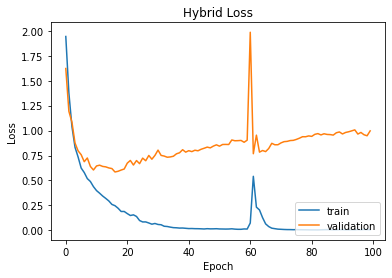

In [11]:
plt.plot(history.history['train hybrid loss'], label = 'train')
plt.plot(history.history['val_test hybrid loss'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.title('Hybrid Loss')
plt.show()

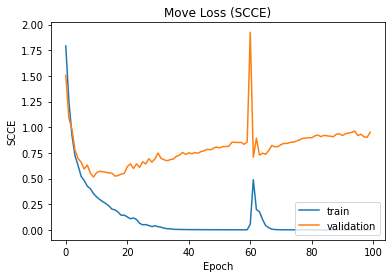

In [30]:
plt.plot(history.history['train m loss'],     label = 'train')
plt.plot(history.history['val_test m loss'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('SCCE')
plt.legend(loc='lower right')
plt.title('Move Loss (SCCE)')
plt.show()

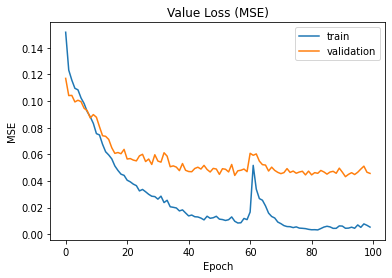

In [27]:
plt.plot(history.history['train v loss'],     label = 'train')
plt.plot(history.history['val_test v loss'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.title('Value Loss (MSE)')
plt.show()

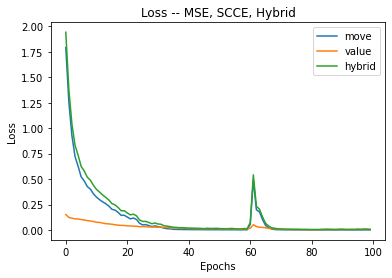

In [24]:
plt.plot(history.history['train m loss'],      label = 'move')
plt.plot(history.history['train v loss'],      label = 'value')
plt.plot(history.history['train hybrid loss'], label = 'hybrid')
plt.title('Loss -- MSE, SCCE, Hybrid')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


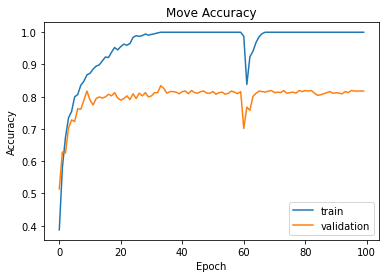

In [31]:
plt.plot(history.history['train m accuracy'],     label = 'train')
plt.plot(history.history['val_test m accuracy'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Move Accuracy')
plt.show()

## Evaluation

Evaluate on the test set and print the test accuracy.

In [57]:
m_pred, v_pred = model.predict(X_test)

In [34]:
accuracy_score(y_move_test.ravel(), np.argmax(m_pred, axis=1))

0.8188453881884539

In [35]:
mean_squared_error(y_value_test, v_pred)

0.04914453

## Prediction

Pick a few game states from test set, and predict their next moves and outcomes. Do you think your model can make reasonable prediction for a given game state? Discuss your findings.

In [36]:
def print_gn(x):
    cur_state = []
    for _ in range(3):
        cur_state.append(3*['-'])
    O_pos_tuple = np.nonzero(x[0])
    for i, j in zip(O_pos_tuple[0], O_pos_tuple[1]):
        cur_state[i][j] = 'O'

    X_pos_tuple = np.nonzero(x[1])
    for i, j in zip(X_pos_tuple[0], X_pos_tuple[1]):
        cur_state[i][j] = 'X'
    cur_gn = MNKNode(cur_state)
    
    print("%s" % cur_gn)
    print("Next player: %s" % cur_gn.next_player())

In [37]:
def print_gn_pred(x):
    x_new = np.expand_dims(x, axis=0)
    m_pred, v_pred = model.predict(x_new)
    m_pred_reshape = np.reshape(m_pred, (3, 3))
    
    print("Move probabilities:")
    for i in m_pred_reshape:
        print(" ".join(['{:.2f}'.format(j) for j in i]))
    print()
    print("Value: %.4f" % v_pred[0][0])

def print_gn_y(y_m,y_v):
    print("Move: %d" % y_m[0])
    print()
    print("Value: {}".format(y_v[0]))

# RESULTS/DISCUSSION

In [38]:
import random

def random_results(X_test=X_test,number=10,seed=1234):
  random.seed(seed)
  j=0
  for i in random.sample(range(0, len(X_test)), number):
    hash_row = '#'*(len(str(j+1))+9)
    print('{}\n# TEST {} #\n{}'.format(hash_row,j+1,hash_row))
    print_gn(X_test[i])
    print_gn_pred(X_test[i])
    j+=1
    print('\n') 

random_results()

##########
# TEST 1 #
##########
- X O
- O X
X O -

Next player: X
Move probabilities:
1.00 0.00 0.00
0.00 0.00 0.00
0.00 0.00 0.00

Value: 0.6399


##########
# TEST 2 #
##########
- X X
- X -
- O O

Next player: O
Move probabilities:
0.74 0.00 0.00
0.00 0.00 0.00
0.26 0.00 0.00

Value: 0.0327


##########
# TEST 3 #
##########
- - -
X - -
X O O

Next player: X
Move probabilities:
1.00 0.00 0.00
0.00 0.00 0.00
0.00 0.00 0.00

Value: 1.0000


##########
# TEST 4 #
##########
X O -
- O O
- X X

Next player: X
Move probabilities:
0.00 0.00 0.00
0.02 0.00 0.00
0.97 0.00 0.00

Value: 0.9964


##########
# TEST 5 #
##########
- O -
X X O
- X -

Next player: O
Move probabilities:
0.51 0.00 0.49
0.00 0.00 0.00
0.00 0.00 0.00

Value: 0.4336


##########
# TEST 6 #
##########
- X O
- - X
O O X

Next player: X
Move probabilities:
0.95 0.00 0.00
0.00 0.05 0.00
0.00 0.00 0.00

Value: 0.6505


##########
# TEST 7 #
##########
- X X
O - O
X O -

Next player: X
Move probabilities:
1.00 0.00 0.00
0.00

I intuitively reject 2/10 of the solutions above.


> Test 2 predicts a sub-optimal move -- O blocks a possible winning move for X, but fails to play a move that would result in an immediate win. The predicted value of this move is 0.0327, which makes sense, since it missed an opportunity to win the game.

> Test 8 results in a winning move, but the predicted value is only 0.0210, which doesn't make sense.

The other eight predictions seem to result in rational moves and predicted values that are within the appropriate range.

Given that there are two outputs -- move and value -- there are two ways each prediction could be accurate or inaccurate. I decided to plot the distributions of moves and values, including both the actual and predicted results.

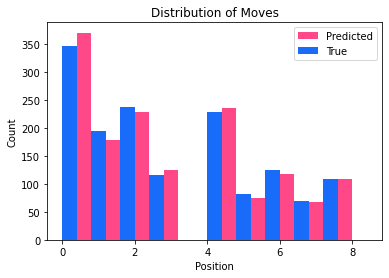

No handles with labels found to put in legend.


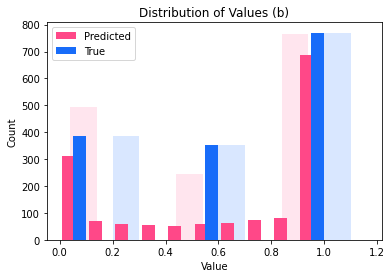

In [183]:
import scipy
import matplotlib.mlab as mlab
from scipy.stats import norm

m_pred_max = [p.tolist().index(max(p)) for p in m_pred]

plt.hist(m_pred_max,       color='#FF4888', width=0.4, align='right',   label='Predicted')
plt.hist(y_move_test[:,0], color='#186CF9', width=0.4, align='mid', label='True')
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Distribution of Moves')
plt.legend()
plt.show()


plt.hist((v_pred[:,0],
          y_value_test[:,0]),
         width=0.1,
         align='mid',
         color=('#FFABC8','#84B2FF'),
         alpha=0.3,
         bins=[0,0.4, 0.8, 1.2])

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribution of Values (a)')
plt.legend()
#plt.show()

plt.hist((v_pred[:,0],
          y_value_test[:,0]),
         width=0.05,
         align='mid',
         color=('#FF4888','#186CF9'),
         label=('Predicted','True'))
         #bins=[0,0.2, 0.4,0.6, 0.8,1,1.2])

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribution of Values (b)')
plt.legend()
plt.show()

The actual and predicted results have closely matching distributions of moves. The distributions of values are not as close, as the predicted results skew toward the 0 and 1, which a large portion of the actual values are 0.5. This may be a better representation of the utility of possible moves, since it allows for intermediate values, but this is not reflected in the 'true' data.

One last note worth making is that the validation loss increases much earlier than 100 epochs. It is possible that model is overfit. We can see how the results would change by limiting the model to training on 20 epochs.

In [185]:
model = ConvResNN()
optimizer = Adam(1e-3)
model.compile(optimizer)

start_time = time()
history2 = model.fit(X_train, [y_move_train, y_value_train],
                    epochs=20,
                    validation_split=0.2,
                    verbose=0)
running_time = time() - start_time

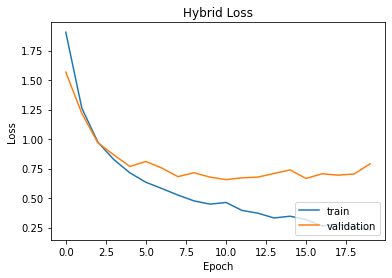

In [187]:
plt.plot(history2.history['train hybrid loss'], label = 'train')
plt.plot(history2.history['val_test hybrid loss'], label = 'validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.title('Hybrid Loss')
plt.show()

In [189]:
m_pred, v_pred = model.predict(X_test)
print(accuracy_score(y_move_test.ravel(), np.argmax(m_pred, axis=1)))
print(mean_squared_error(y_value_test, v_pred))

0.7803583278035833
0.08021309


These values are comparable to the ones when the training was on 100 epochs.

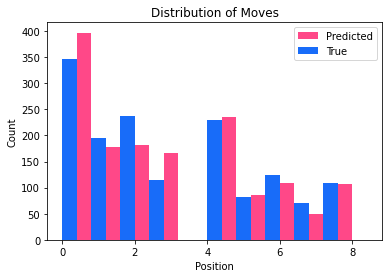

No handles with labels found to put in legend.


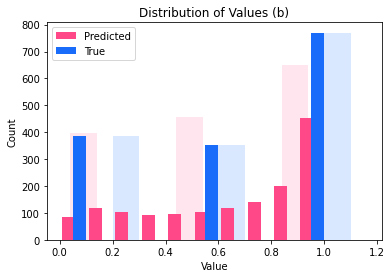

In [190]:
m_pred_max = [p.tolist().index(max(p)) for p in m_pred]

plt.hist(m_pred_max,       color='#FF4888', width=0.4, align='right',   label='Predicted')
plt.hist(y_move_test[:,0], color='#186CF9', width=0.4, align='mid', label='True')
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Distribution of Moves')
plt.legend()
plt.show()


plt.hist((v_pred[:,0],
          y_value_test[:,0]),
         width=0.1,
         align='mid',
         color=('#FFABC8','#84B2FF'),
         alpha=0.3,
         bins=[0,0.4, 0.8, 1.2])

plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribution of Values (a)')
plt.legend()
#plt.show()

plt.hist((v_pred[:,0],
          y_value_test[:,0]),
         width=0.05,
         align='mid',
         color=('#FF4888','#186CF9'),
         label=('Predicted','True'))
         #bins=[0,0.2, 0.4,0.6, 0.8,1,1.2])
         


plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribution of Values (b)')
plt.legend()
plt.show()

The distribution of moves still closely matches the 'true' data, and the distribution of values exhibits a closer match between predicted and actual data.

There are additional ways that we can compare this model against the original, but it is worth exploring, since over-fitting can lead to sub-optimal solutions when looking at unseen data.